# Binary Heap
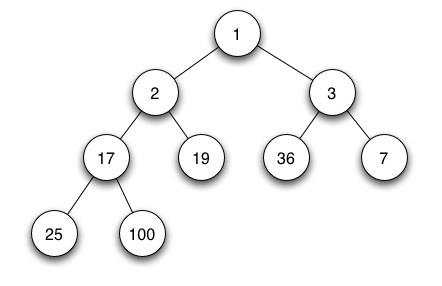

## Properties:
- binary tree structure
- either minimum heap or maximum heap:
    - min: root key is minimum value of all keys in heap
    - max: root key is max value of all keys in heap
        - for both types this property must be true recursively for all nodes
- binary heap is a complete tree:
    - all levels are completely filled except possibly last level and last level has keys as left as possible
   
- can use binary heap to sort a list of numbers in O(log(N)) time using Heap Sort
- can get min or max items in constant time



## Array Implementation (fixed size)
- preferred implementation since binary heap is a complete BT --> space efficient despite array implementation
- index of root is 1 (index 0 unused)
- for a given node at index n:
    - left child is at 2n
    - right child is at 2n + 1

In [29]:
class Heap:
    def __init__(self, size, heap_type):
        self.custom_list = (size + 1) * [None]
        self.heap_size = 0
        self.max_size = size + 1
        self.values = [] # used to store output from traversals
        self.heap_type = heap_type # max or min
    
    def build_heap(self, values):
        for i in values:
            self.insert(i)
    
    def peek(self):
        if self.custom_list[1] is None:
            return
        else:
            return self.custom_list[1]
    
    def size(self):
        return self.heap_size
          
    def heapify_insert(self, index): # bubble up method
        parent_ind = int(index/2)
        if index <= 1:
            return
        if self.heap_type == 'min':
            if self.custom_list[index] < self.custom_list[parent_ind]:
                temp = self.custom_list[index]
                self.custom_list[index] = self.custom_list[parent_ind]
                self.custom_list[parent_ind] = temp
            self.heapify_insert(parent_ind)
        elif self.heap_type == 'max':
            if self.custom_list[index] > self.custom_list[parent_ind]:
                temp = self.custom_list[index]
                self.custom_list[index] = self.custom_list[parent_ind]
                self.custom_list[parent_ind] = temp
            self.heapify_insert(parent_ind)
    
    def insert(self, value):
        if self.heap_size + 1 == self.max_size:
            return
        self.custom_list[self.heap_size+1] = value
        self.heap_size += 1
        self.heapify_insert(self.heap_size)
        
    
    def heapify_extract(self, index): # bubble down
        left_ind = index * 2
        right_ind = index * 2 + 1
        swap = 0
        
        if self.heap_size < left_ind:
            return
        elif self.heap_size == left_ind:
            if self.heap_type == 'min':
                if self.custom_list[index] > self.custom_list[left_ind]:
                    temp = self.custom_list[index]
                    self.custom_list[index] = self.custom_list[left_ind]
                    self.custom_list[left_ind] = temp
                return
            else:
                if self.custom_list[index] < self.custom_list[left_ind]:
                    temp = self.custom_list[index]
                    self.custom_list[index] = self.custom_list[left_ind]
                    self.custom_list[left_ind] = temp
                return
        else:
            if self.heap_type == 'min':
                if self.custom_list[left_ind] < self.custom_list[right_ind]:
                    swap = left_ind
                else:
                    swap = right_ind
                if self.custom_list[index] > self.custom_list[swap]:
                    temp = self.custom_list[index]
                    self.custom_list[index] = self.custom_list[swap]
                    self.custom_list[swap] = temp
            else:
                if self.custom_list[left_ind] > self.custom_list[right_ind]:
                    swap = left_ind
                else:
                    swap = right_ind
                if self.custom_list[index] > self.custom_list[swap]:
                    temp = self.custom_list[index]
                    self.custom_list[index] = self.custom_list[swap]
                    self.custom_list[swap] = temp
            self.heapify_extract(swap)
    
    def extract(self):
        if self.heap_size == 0:
            return
        else:
            extracted = self.custom_list[1]
            self.custom_list[1] = self.custom_list[self.heap_size]
            self.custom_list[self.heap_size] = None
            self.heap_size -= 1
            self.heapify_extract(1)
            return extracted
    
    def pre_order_traversal(self): # 1 2 4 5 3 6 7
        self.values = []
        self.pre_order_traversal_r(1)
        return self.values

    def pre_order_traversal_r(self, index):
        if index > self.heap_size:
            return
        self.values.append(self.custom_list[index])
        self.pre_order_traversal_r(index * 2)
        self.pre_order_traversal_r(index*2 + 1)
        
    def in_order_traversal(self):
        self.values = []
        self.in_order_traversal_r(1)
        return self.values
    
    def in_order_traversal_r(self, index):
        if index > self.heap_size:
            return
        self.in_order_traversal_r(index * 2)
        self.values.append(self.custom_list[index])
        self.in_order_traversal_r(index*2 + 1)
    
    def reverse_order_traversal(self):
        self.values = []
        self.reverse_order_traversal_r(1)
        return self.values
    
    def reverse_order_traversal_r(self, index):
        if index > self.heap_size:
            return
        self.reverse_order_traversal_r(index*2 + 1)
        self.values.append(self.custom_list[index])
        self.reverse_order_traversal_r(index*2)
        
    def post_order_traversal(self):
        self.values = []
        self.post_order_traversal_r(1, last_index)
        return self.values
    
    def post_order_traversal_r(self, index, last):
        if index > self.heap_size:
            return
        self.post_order_traversal_r(index * 2)
        self.post_order_traversal_r(index*2 + 1)
        self.values.append(self.custom_list[index])
    
    def level_order_traversal(self):
        self.values = []
        if self.custom_list[1] is None:
            return self.values
        else:
            for i in range(1, self.heap_size+1):
                self.values.append(self.custom_list[i])
        return self.values
    
    def heap_sort(self): # only works correctly for min heap ... ?
        while self.heap_size != 0:
            print(self.extract())
    
    def delete_heap(self):
        self.custom_list = None
        self.heap_size = 0
        self.values = []
            
        
    

In [30]:
heap = Heap(5, 'min')
heap.insert(1)
heap.insert(5)
heap.insert(4)
heap.insert(2)
heap.heap_sort()

1
2
4
5


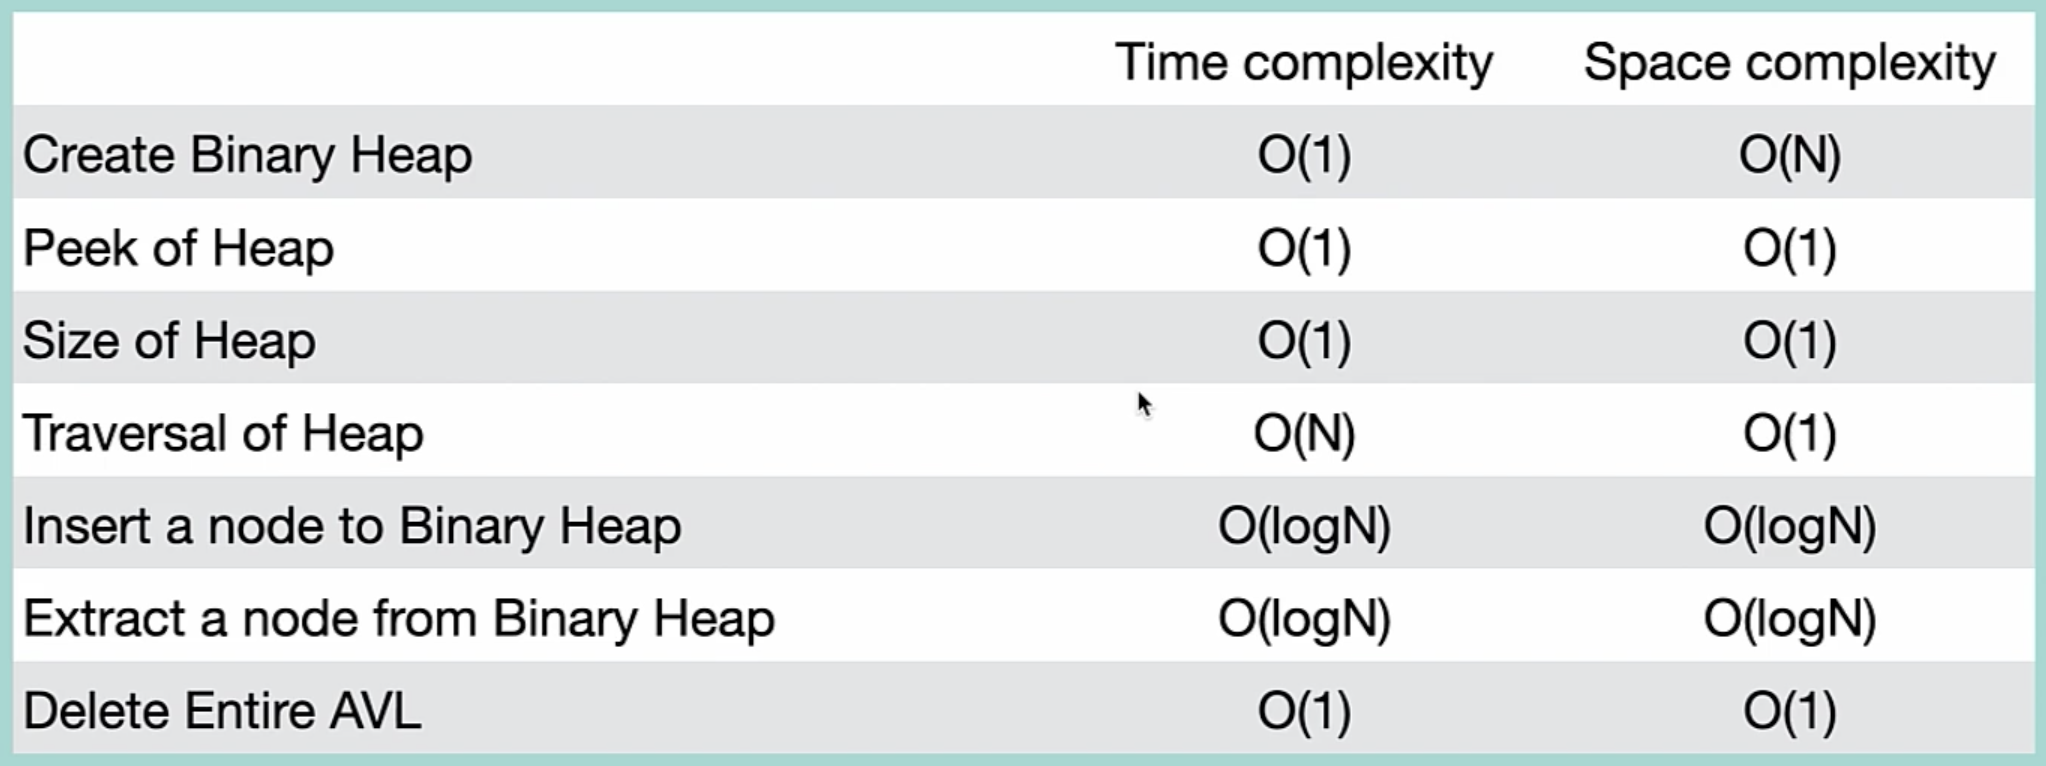